In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = r"F:\neuron project with Jesus"

df = pd.read_csv(f"{file_path}/filter_renamed_raw_matrix.csv", index_col = 0)


In [3]:
df

,CL2_VEH_3d_1,CL2_VEH_3d_2,CL2_VEH_3d_3,CL2_VEH_3d_4,CL2_VEH_3d_5,CL2_VEH_3d_6,CL5_VEH_3d_1,CL5_VEH_3d_2,CL5_VEH_3d_3,CL5_VEH_3d_4,...,CL2_DAPT_16d_3,CL2_DAPT_16d_4,CL2_DAPT_16d_5,CL2_DAPT_16d_6,CL5_DAPT_16d_1,CL5_DAPT_16d_2,CL5_DAPT_16d_3,CL5_DAPT_16d_4,CL5_DAPT_16d_5,CL5_DAPT_16d_6
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,537378.0,715529.0,891815.00,1109930.0,671624.0,1038120.0,366861.0,505967.0,407748.00,457274.0,...,429851.00,541818.0,514498.00,515546.0,538364.0,575636.0,607012.0,586532.0,628174.0,538023.0
PIGBOS1,31689.1,168546.0,42261.10,42246.3,NaN,NaN,159359.0,38719.9,NaN,164553.0,...,55695.30,57692.7,30121.80,NaN,30409.6,74205.8,40609.9,NaN,44623.6,66148.4
TMEM275,67777.3,31910.6,99747.60,46045.0,53093.8,39986.9,117568.0,88769.4,130019.00,149649.0,...,27415.80,NaN,76116.90,NaN,69326.5,69009.2,58308.2,NaN,54567.2,57538.0
CENPVL1,17992.2,16976.2,7475.95,25831.0,17926.5,17589.5,55468.7,41741.8,54137.70,66724.9,...,7033.51,16311.4,9453.53,34999.3,45253.9,51757.7,25132.8,33391.4,29245.4,22509.0
NBDY,954028.0,681522.0,731666.00,585953.0,671031.0,605351.0,755292.0,638894.0,632823.00,701138.0,...,358583.00,586829.0,317068.00,554519.0,453530.0,603996.0,325114.0,367215.0,328900.0,557972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MYO16,89141.0,87469.4,74539.50,84696.2,105419.0,58427.7,104347.0,70757.5,97873.00,81302.3,...,128957.00,109979.0,132658.00,99003.3,123061.0,146071.0,94985.9,94516.5,121374.0,134758.0
MORC2,1892940.0,1454230.0,1821140.00,1642340.0,1817900.0,1676320.0,2011200.0,1748410.0,1898360.00,1649060.0,...,2555800.00,2534990.0,2513730.00,2623680.0,1894660.0,1848480.0,1765020.0,1963490.0,1903060.0,1972260.0
IVNS1ABP,526229.0,524431.0,568194.00,605885.0,799871.0,705138.0,551678.0,584367.0,425735.00,515127.0,...,295407.00,350116.0,427796.00,410643.0,463163.0,530948.0,467519.0,475551.0,522119.0,414017.0


In [4]:
# filter missing values half of samples

df4 = df.copy()

In [5]:
from scipy.stats import zscore

df_log = np.log2(df4 + 1) 

df_z = pd.DataFrame(
    zscore(df_log, axis=0, nan_policy="omit"),
    index=df_log.index,
    columns=df_log.columns
)

In [6]:
df_tic = df4.div(df4.sum(), axis=1) * 100000000000

# log transform 
df_log2 = np.log2(df_tic + 1)

# protein-wise Z-score 
df_z2 = df_log2.sub(df_log2.mean(axis=1), axis=0) \
             .div(df_log2.std(axis=1), axis=0)

df_z2

,CL2_VEH_3d_1,CL2_VEH_3d_2,CL2_VEH_3d_3,CL2_VEH_3d_4,CL2_VEH_3d_5,CL2_VEH_3d_6,CL5_VEH_3d_1,CL5_VEH_3d_2,CL5_VEH_3d_3,CL5_VEH_3d_4,...,CL2_DAPT_16d_3,CL2_DAPT_16d_4,CL2_DAPT_16d_5,CL2_DAPT_16d_6,CL5_DAPT_16d_1,CL5_DAPT_16d_2,CL5_DAPT_16d_3,CL5_DAPT_16d_4,CL5_DAPT_16d_5,CL5_DAPT_16d_6
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,0.181312,1.700914,2.027487,3.609019,1.191007,3.149030,-2.201252,-1.015221,-1.650686,-1.301119,...,-0.977552,0.125677,-0.021298,0.001716,0.077272,0.399642,0.771650,0.577262,1.014655,0.371867
PIGBOS1,-0.729760,2.798784,-0.359768,-0.108378,NaN,NaN,2.325385,-0.724618,NaN,2.337642,...,0.376964,0.462938,-0.834665,NaN,-0.864683,0.978534,-0.207423,NaN,0.024148,0.868605
TMEM275,0.218073,-1.049902,0.713496,-0.445550,-0.226117,-0.754455,0.963653,0.346206,1.166311,1.346918,...,-1.441854,NaN,0.424437,NaN,0.215086,0.211547,-0.040197,NaN,-0.125983,-0.002594
CENPVL1,-0.113164,-0.143966,-1.939401,0.582345,-0.129537,-0.188891,1.726258,1.078416,1.705549,2.019928,...,-1.901324,-0.332166,-1.304840,1.123665,1.549355,1.802759,0.515753,1.027635,0.829903,0.375335
NBDY,2.226307,1.555291,1.375993,1.149092,1.413782,1.149607,1.393824,0.863606,1.021058,1.165076,...,-0.061230,1.074436,-0.280856,0.997819,0.478878,1.136760,-0.210867,0.048911,-0.143214,1.096537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MYO16,-0.876523,-0.780849,-2.094663,-1.033789,-0.187112,-2.745779,-0.769396,-2.695494,-0.985503,-1.938672,...,0.576355,-0.071305,0.808898,-0.419848,0.388245,1.126334,-0.583815,-0.637114,0.532991,1.045619
MORC2,-0.477606,-1.730201,-1.306232,-1.198927,-0.734902,-1.265816,-0.881548,-2.041091,-1.133230,-2.148137,...,1.064448,1.054979,1.120444,1.378328,-0.609358,-0.733818,-0.841085,-0.283201,-0.314190,-0.021173
IVNS1ABP,1.268403,1.420190,1.142490,1.886593,2.917421,2.362566,0.929377,0.897181,-0.051777,0.551844,...,-1.140591,-0.437138,0.441808,0.290306,0.662538,1.217567,0.818607,0.856180,1.331454,0.471174


<Axes: >

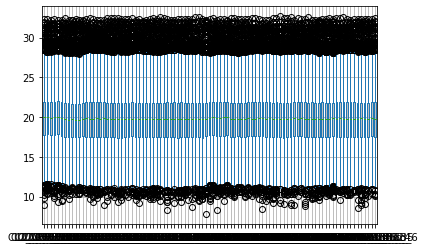

In [7]:
df_log2.boxplot()

In [8]:
ratio = df_log2.loc["PRPH"]/df_log2.loc["GPM6A"]

In [9]:
zscore = (ratio - ratio.mean()) / ratio.std()

In [28]:
import os

def plot_row_ratio_group_4times_overlay2(
    df,
    num_row="PRPH",
    denom_row="GPM6A",
    genotypes=("CL2", "CL5"),
    treatments=("VEH", "DAPT"),
    times=("3d","4d","8d","16d"),
    figsize=(8,6),
    ylabel="Ratio (num/denom)",
    robust_ylim=True,
    y_percentiles=(5, 99),
    log2_ratio=False,          # 如果你希望画 log2(ratio) 就设 True
    out_path=None,
    save_ext="svg",
):
    # ---------- safety checks ----------
    if num_row not in df.index:
        raise KeyError(f"{num_row} not found in df.index")
    if denom_row not in df.index:
        raise KeyError(f"{denom_row} not found in df.index")

    # ---------- compute ratio in wide-form (per column/sample) ----------
    ratio_wide = df.loc[num_row] / df.loc[denom_row]

    if log2_ratio:
        # 避免 ratio<=0 导致 log2 出错（一般你的 df_log2 不会出现，但以防万一）
        ratio_wide = ratio_wide.replace([np.inf, -np.inf], np.nan)
        ratio_wide = ratio_wide.where(ratio_wide > 0, np.nan)
        ratio_wide = np.log2(ratio_wide)
        ylabel = f"log2({ylabel})"

    # ---------- build long-form ----------
    rows = []
    for g in genotypes:
        for tr in treatments:
            cond_cols = [c for c in df.columns if c.startswith(f"{g}_{tr}_")]
            if len(cond_cols) == 0:
                continue

            sub = ratio_wide.loc[cond_cols]  # Series: columns -> ratio

            for t in times:
                cols_t = [c for c in cond_cols if f"_{t}_" in c]
                for c in cols_t:
                    v = sub.get(c)
                    if pd.notna(v):
                        rows.append({
                            "Group": f"{g}_{tr}",
                            "Genotype": g,
                            "Treatment": tr,
                            "Time": t,
                            "Value": float(v)
                        })

    plot_df = pd.DataFrame(rows)
    if plot_df.empty:
        raise ValueError(f"No data found for ratio={num_row}/{denom_row}")

    plot_df["Time"] = pd.Categorical(plot_df["Time"], categories=list(times), ordered=True)
    plot_df["Group"] = pd.Categorical(
        plot_df["Group"],
        categories=[f"{g}_{t}" for g in genotypes for t in treatments],
        ordered=True
    )

    # ---------- plotting ----------
    sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)
    plt.figure(figsize=figsize)

    sns.boxplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        showfliers=False,
        width=0.6,
        linewidth=1.5
    )

    sns.stripplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        dodge=True,
        jitter=0.15,
        alpha=0.6,
        size=5,
        linewidth=0
    )

    # fix duplicated legend
    handles, labels = plt.gca().get_legend_handles_labels()
    n_times = len(times)
    plt.legend(handles[:n_times], labels[:n_times], title="Time",
               fontsize=14, title_fontsize=14)

    plt.xlabel("Group", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=20)
    plt.title(f"{num_row} / {denom_row}", fontsize=20)

    if robust_ylim:
        y = plot_df["Value"].values
        lo, hi = np.percentile(y, list(y_percentiles))
        pad = 0.2 * (hi - lo) if hi > lo else 1.0
        plt.ylim(lo - pad, hi + pad)

    plt.tight_layout()

    # if out_path is not None:
    #     os.makedirs(out_path, exist_ok=True)
    #     save_file = os.path.join(out_path, f"{num_row}_over_{denom_row}.{save_ext}")
    #     plt.savefig(save_file, dpi=600, bbox_inches="tight")

    plt.show()
    return plot_df


In [40]:
def plot_row_ratio_group_4times_overlay(
    df,
    num_row="PRPH",
    denom_row="GPM6A",
    genotypes=("CL2", "CL5"),
    treatments=("VEH", "DAPT"),
    times=("3d","4d","8d","16d"),
    figsize=(8,6),
    ylabel="Z-score (ratio)",
    robust_ylim=True,
    y_percentiles=(5, 99),
    out_path=None,
):

    # ---------- compute ratio ----------
    ratio = df.loc[num_row] / df.loc[denom_row]

    # ---------- Z-score normalization ----------
    ratio_z = (ratio - ratio.mean()) / ratio.std()

    # ---------- build long-form ----------
    rows = []
    for g in genotypes:
        for tr in treatments:
            cond_cols = [c for c in df.columns if c.startswith(f"{g}_{tr}_")]
            for t in times:
                cols_t = [c for c in cond_cols if f"_{t}_" in c]
                for c in cols_t:
                    v = ratio_z.get(c)
                    if pd.notna(v):
                        rows.append({
                            "Group": f"{g}_{tr}",
                            "Genotype": g,
                            "Treatment": tr,
                            "Time": t,
                            "Value": float(v)
                        })

    plot_df = pd.DataFrame(rows)
    plot_df["Time"] = pd.Categorical(plot_df["Time"], categories=times, ordered=True)
    plot_df["Group"] = pd.Categorical(
        plot_df["Group"],
        categories=[f"{g}_{t}" for g in genotypes for t in treatments],
        ordered=True
    )

    # ---------- plot ----------
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)
    plt.figure(figsize=figsize)

    sns.boxplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        showfliers=False,
        width=0.6
    )

    sns.stripplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        dodge=True,
        jitter=0.15,
        alpha=0.6,
        size=5
    )

    handles, labels = plt.gca().get_legend_handles_labels()
    n_times = len(times)
    plt.legend(handles[:n_times], labels[:n_times], title="Time",
               fontsize=16, title_fontsize=16)

    plt.xlabel("Group", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=20)
    plt.title("Ratio(PRPH/GPM6A)", fontsize=20)

    if robust_ylim:
        lo, hi = np.percentile(plot_df["Value"], [5, 95])
        pad = 0.2 * (hi - lo)
        plt.ylim(lo - pad, hi + pad)

    plt.tight_layout()

    if out_path:
        plt.savefig(f"{out_path}/PRPH_over_GPM6A_Zscore.svg",
                    dpi=600, bbox_inches="tight")

    plt.show()

    # return plot_df


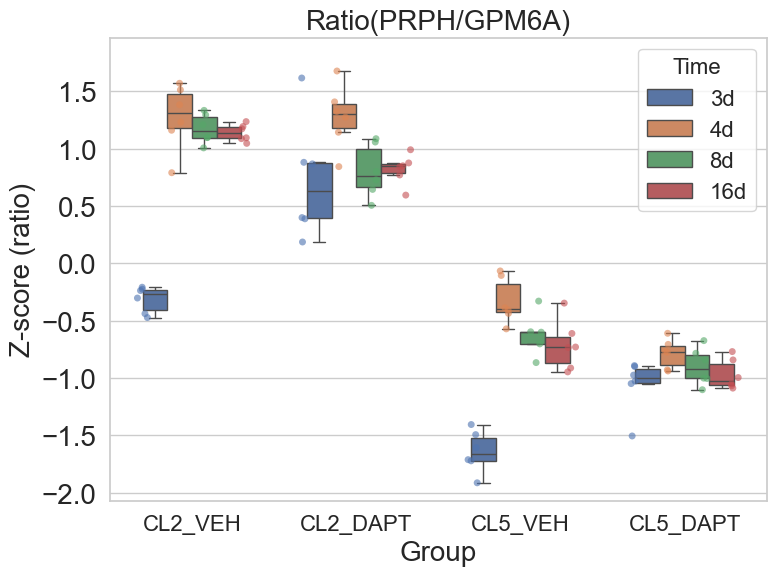

In [41]:
plot_row_ratio_group_4times_overlay(
    df_log2,
    num_row="PRPH",
    denom_row="GPM6A",
    genotypes=("CL2", "CL5"),
    treatments=("VEH", "DAPT"),
    times=("3d","4d","8d","16d"),
    figsize=(8,6),
    ylabel="Z-score (ratio)",
    robust_ylim=True,
    y_percentiles=(5, 99),
    out_path = r"F:\neuron project with Jesus\figures",
)

In [10]:

from itertools import combinations
from scipy.stats import ttest_ind

# ---- Set global font once ----
plt.rcParams["font.family"] = "Arial"


In [42]:

import seaborn as sns


In [12]:

def plot_gene_timecourse_quantile(
    df, gene, genotype="HOM", treatment="VEH",
    times=("3d","4d","8d","16d")
):
    cond_cols = [c for c in df.columns if c.startswith(f"{genotype}_{treatment}_")]
    sub = df.loc[gene, cond_cols]

    rows = []
    for t in times:
        cols_t = [c for c in cond_cols if f"_{t}_" in c]
        for c in cols_t:
            rows.append({"Time": t, "Value": float(sub[c])})

    plot_df = pd.DataFrame(rows)

    sns.set_theme(font="Arial", font_scale=1.4)
    plt.figure(figsize=(7,6))

    # Quantile boxes (25–75%)
    sns.boxplot(
        data=plot_df,
        x="Time",
        y="Value",
        width=0.5,
        showfliers=False,     # 不画极端点
        linewidth=2
    )

    # Show individual replicates
    sns.stripplot(
        data=plot_df,
        x="Time",
        y="Value",
        size=7,
        jitter=0.15,
        alpha=0.7
    )

    # Robust Y-axis scaling
    y = plot_df["Value"].values
    ymin, ymax = np.percentile(y, [5, 95])
    pad = 0.15 * (ymax - ymin)
    plt.ylim(ymin - pad, ymax + pad)

    plt.ylabel("Intensity", fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f"{gene} | {genotype} {treatment}", fontsize=18)

    plt.tight_layout()
    plt.show()


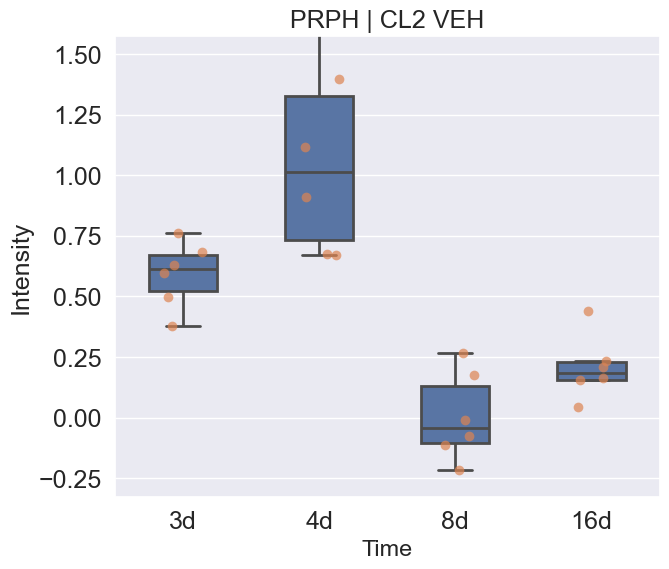

In [13]:
plot_gene_timecourse_quantile(
    df_z2, gene = "PRPH",  
    genotype="CL2", treatment="VEH",
    times=("3d","4d","8d","16d")
)

In [14]:
import os

def plot_gene_group_4times_overlay(
    df,
    gene,
    genotypes=("CL2", "CL5"),
    treatments=("VEH", "DAPT"),
    times=("3d","4d","8d","16d"),
    figsize=(8,6),
    ylabel="Intensity",
    robust_ylim=True,
    y_percentiles=(5, 99),
):
 

    # ---------- build long-form ----------
    rows = []
    for g in genotypes:
        for tr in treatments:
            cond_cols = [c for c in df.columns if c.startswith(f"{g}_{tr}_")]
            if len(cond_cols) == 0:
                continue
            sub = df.loc[gene, cond_cols]

            for t in times:
                cols_t = [c for c in cond_cols if f"_{t}_" in c]
                for c in cols_t:
                    v = sub.get(c)
                    if pd.notna(v):
                        rows.append({
                            "Group": f"{g}_{tr}",
                            "Genotype": g,
                            "Treatment": tr,
                            "Time": t,
                            "Value": float(v)
                        })

    plot_df = pd.DataFrame(rows)
    if plot_df.empty:
        raise ValueError(f"No data found for gene={gene}")

    plot_df["Time"] = pd.Categorical(plot_df["Time"], categories=list(times), ordered=True)
    plot_df["Group"] = pd.Categorical(
        plot_df["Group"],
        categories=[f"{g}_{t}" for g in genotypes for t in treatments],
        ordered=True
    )

    # ---------- plotting ----------
    sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)
    plt.figure(figsize=figsize)

    # boxplot: X = Group, hue = Time
    sns.boxplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        showfliers=False,
        width=0.6,
        linewidth=1.5
    )

    # dots
    sns.stripplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        dodge=True,
        jitter=0.15,
        alpha=0.6,
        size=5,
        linewidth=0
    )

    # fix duplicated legend
    handles, labels = plt.gca().get_legend_handles_labels()
    n_times = len(times)
    plt.legend(handles[:n_times], labels[:n_times], title="Time",
               fontsize=14, title_fontsize=14)

    # Axis formatting
    plt.xlabel("Group", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=20)
    plt.title(f"{gene}", fontsize=20)

    # Robust y-axis
    if robust_ylim:
        y = plot_df["Value"].values
        lo, hi = np.percentile(y, list(y_percentiles))
        pad = 0.2 * (hi - lo) if hi > lo else 1.0
        plt.ylim(lo - pad, hi + pad)

    plt.tight_layout
    
    save_file = os.path.join(out_path, f"{gene}.svg")
    plt.savefig(save_file, dpi=600, bbox_inches="tight")
    plt.show()

    return plot_df


In [96]:
# df_z2.to_csv(f'{file_path}/filter_renamed_normalized_matrix.csv')
# df_z2.head().to_csv(f'{file_path}/test.csv')

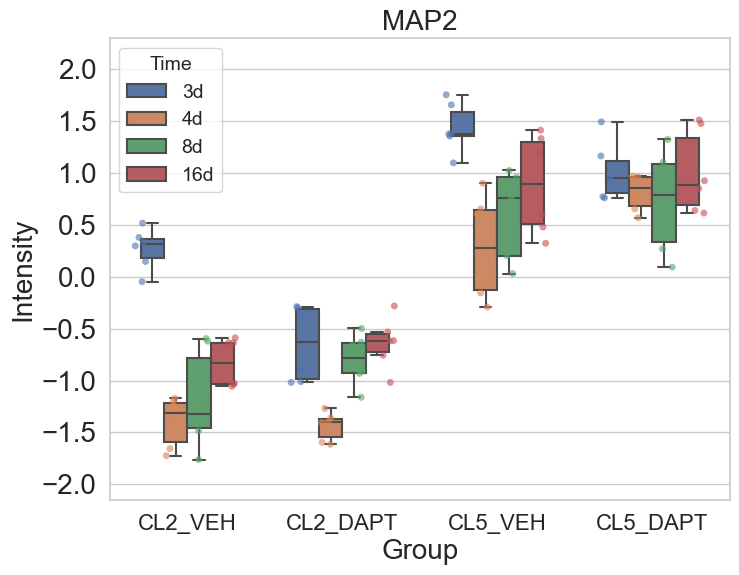

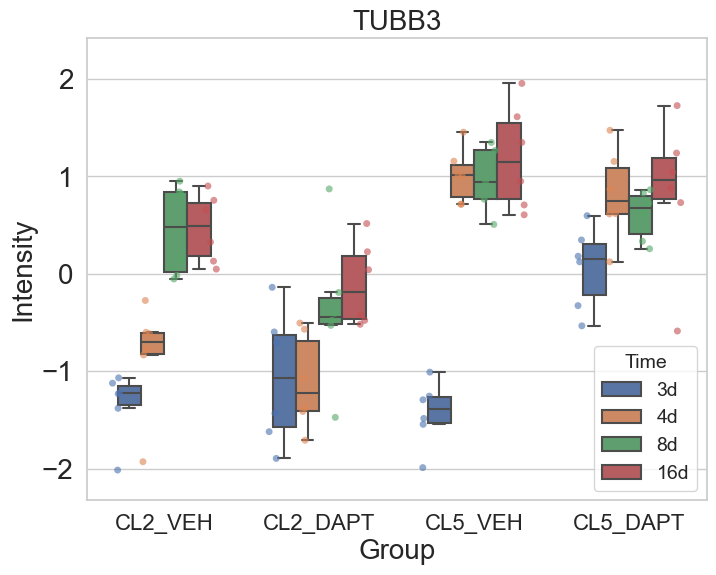

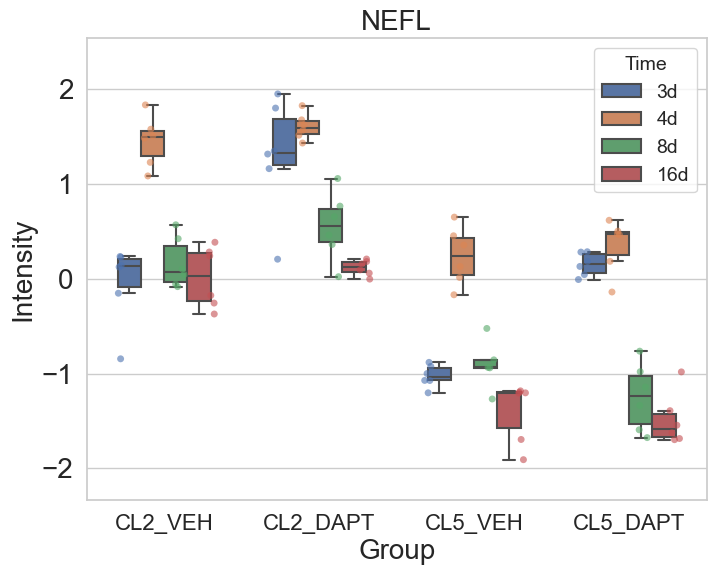

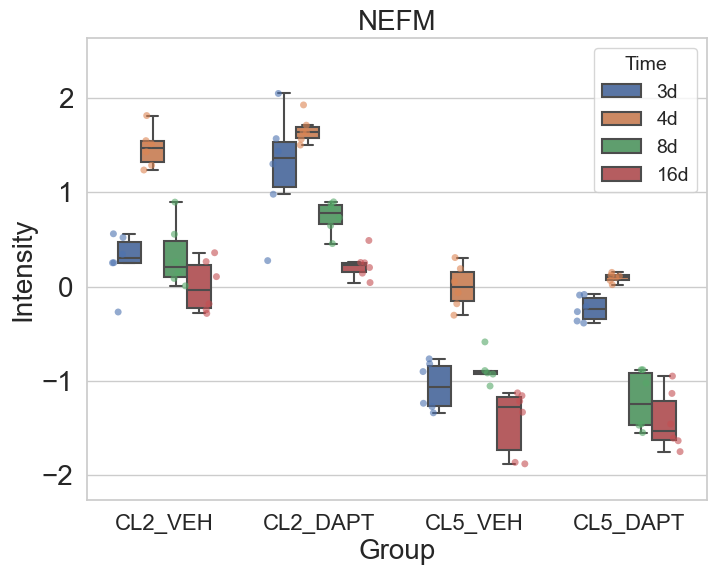

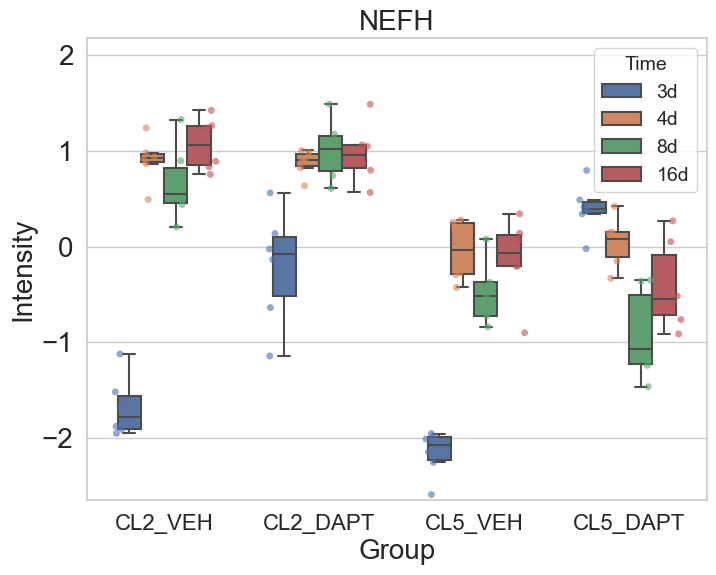

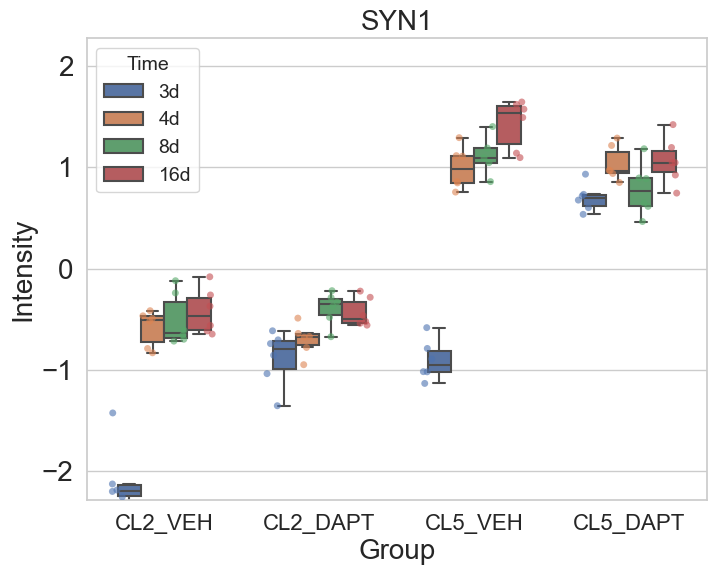

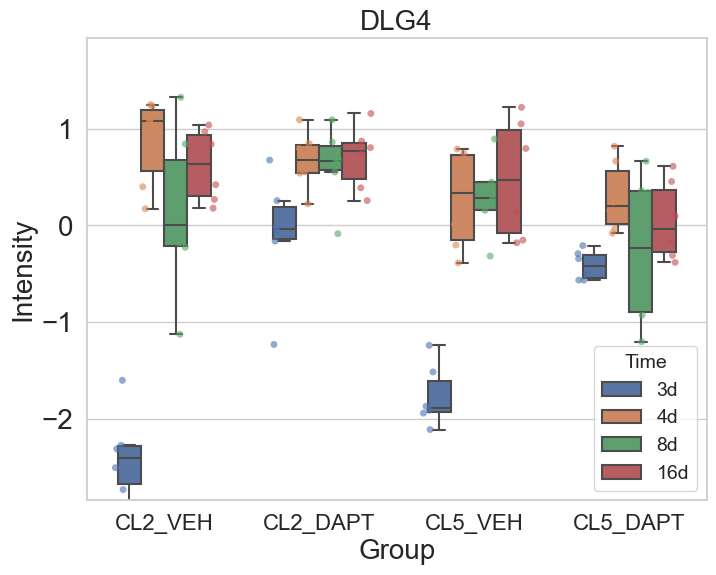

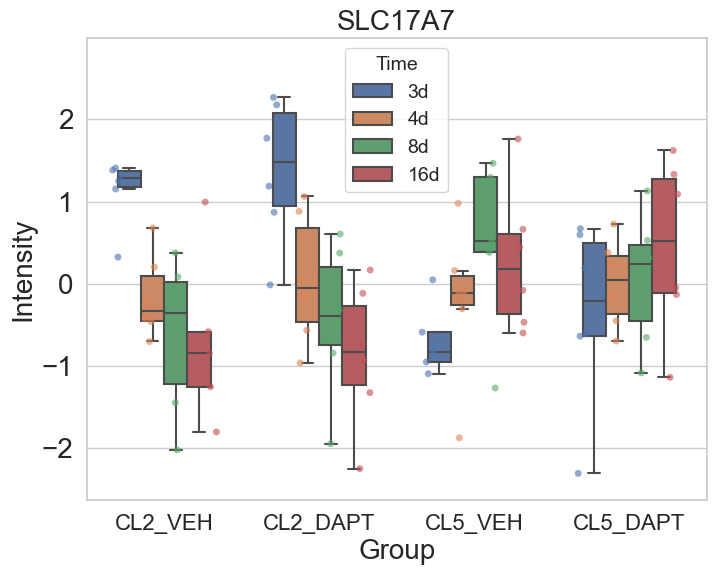

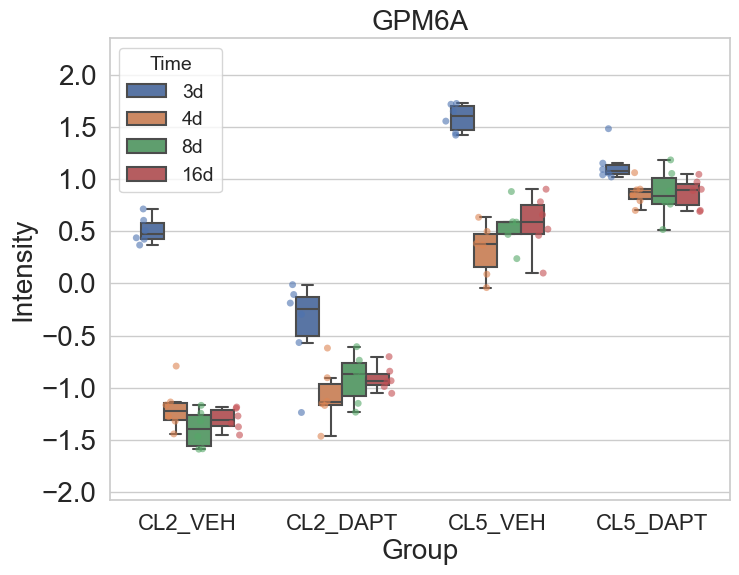

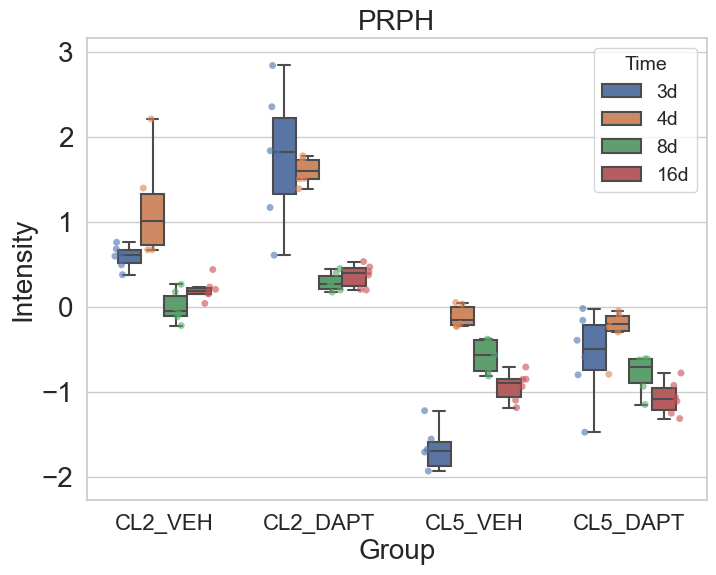

In [26]:


gene_list = ["MAP2", "TUBB3", "NEFL","NEFM","NEFH", "SYN1", "DLG4" , "SLC17A7" , "GPM6A","PRPH"]

out_path = r"C:\projectx work with Jesus\New results (doxycycline time course)\figures"

for name in gene_list: 
    plot_gene_group_4times_overlay(df_z2, gene = name)

NameError: name 'out_path' is not defined

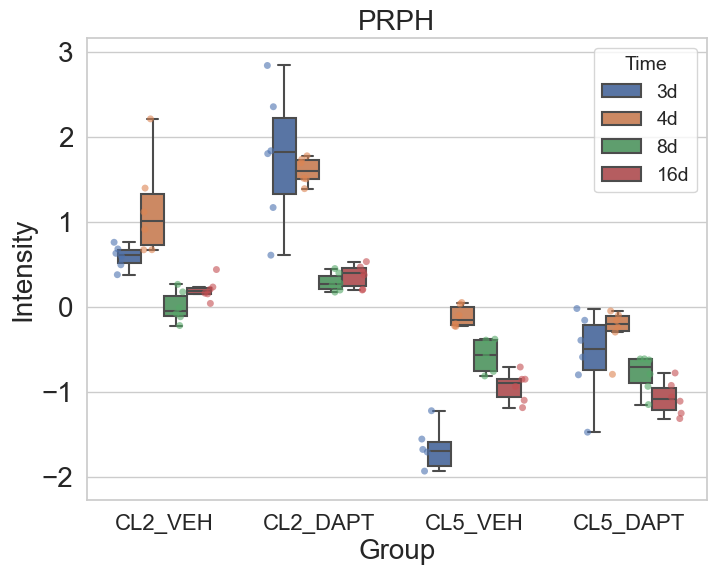

In [43]:
plot_gene_group_4times_overlay(df_z2, gene = "PRPH")

In [89]:
# plot_gene_group_4times_overlay(df_z2, gene = "PRPH")

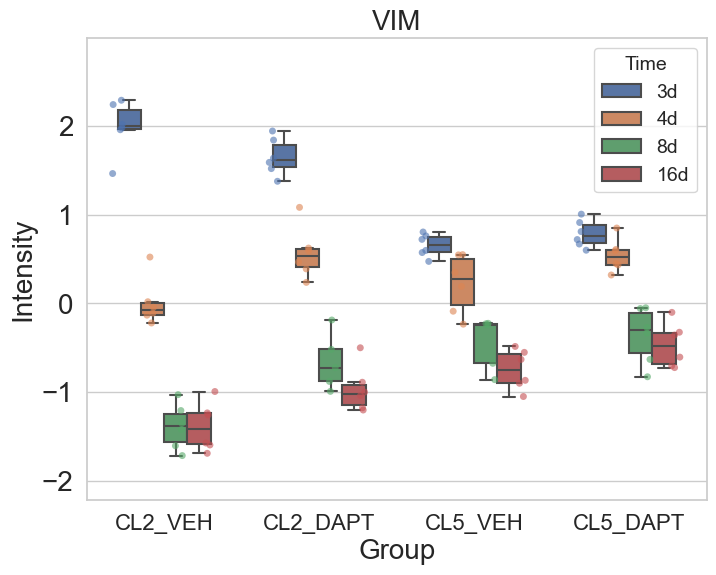

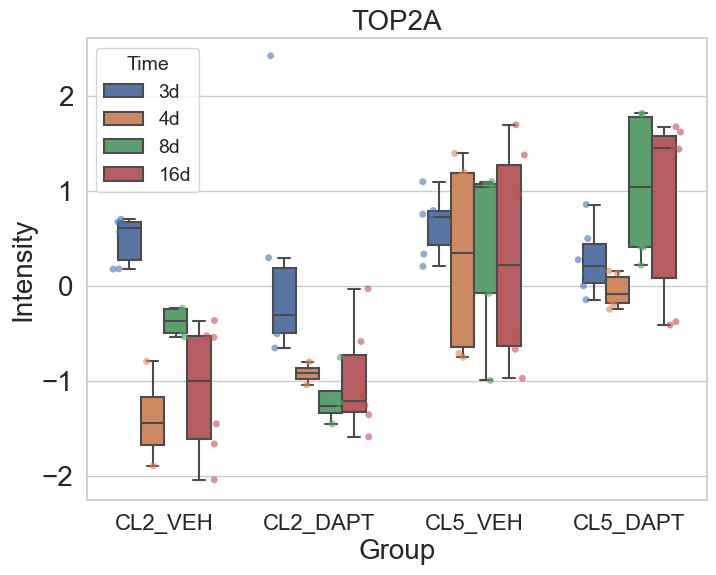

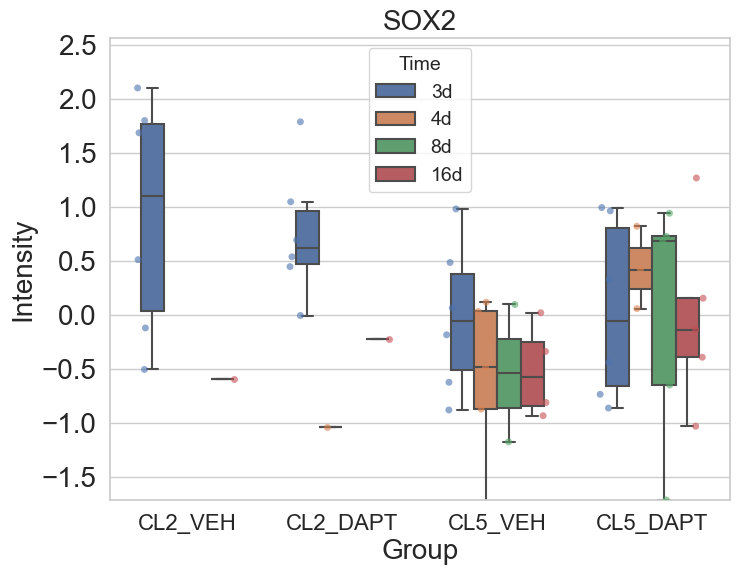

KeyError: 'GFAP'

In [90]:
gene_list2 = ["VIM", "TOP2A", "SOX2", "GFAP"] 

out_path = r"C:\projectx work with Jesus\New results (doxycycline time course)\figures"

for name in gene_list2: 
    plot_gene_group_4times_overlay(df_z2, gene = name)



In [91]:
import re
import numpy as np
import pandas as pd

def gene_time_trend_single(
    df,
    gene,
    times=("3d","4d","8d","16d"),
    genotypes=("HOM","HET"),
    treatments=("VEH","DAPT"),
    agg="mean",           # mean or median across replicates
    method="slope",      # slope | delta | spearman
    eps=0.0              # threshold for calling up/down
):
    """
    For one gene, return:
      1) mean time-course per group
      2) trend per group (Up / Down / Flat)
    """
    # ---- 防止 tuple 嵌套
    def _flatten(x):
        if isinstance(x, (list, tuple)) and len(x) == 1 and isinstance(x[0], (list, tuple)):
            return tuple(x[0])
        return tuple(x)

    times = _flatten(times)
    genotypes = _flatten(genotypes)
    treatments = _flatten(treatments)
    
    pat = re.compile(r"^(?P<geno>[^_]+)_(?P<trt>[^_]+)_(?P<time>[^_]+)_(?P<rep>\d+)$")

    rows = []
    for c in df.columns:
        m = pat.match(c)
        if not m:
            continue
        geno, trt, t, rep = m.group("geno"), m.group("trt"), m.group("time"), int(m.group("rep"))
        if geno in genotypes and trt in treatments and t in times:
            v = df.loc[gene, c]
            if pd.notna(v):
                rows.append((geno, trt, f"{geno}_{trt}", t, rep, float(v)))

    if len(rows) == 0:
        raise ValueError(f"No data found for gene {gene}")

    long = pd.DataFrame(rows, columns=["Genotype","Treatment","Group","Time","Rep","Value"])
    long["Time"] = pd.Categorical(long["Time"], categories=list(times), ordered=True)

    # ---- aggregate replicates at each timepoint
    if agg == "median":
        mean_df = long.groupby(["Group","Genotype","Treatment","Time"], observed=True)["Value"].median().reset_index()
    else:
        mean_df = long.groupby(["Group","Genotype","Treatment","Time"], observed=True)["Value"].mean().reset_index()

    # numeric time
    tmap = {t:i for i,t in enumerate(times)}
    mean_df["t"] = mean_df["Time"].map(tmap).astype(float)

    # ---- compute trends
    out = []
    for g, sub in mean_df.groupby("Group"):
        sub = sub.sort_values("t")
        if sub.shape[0] < 3:
            out.append((g, "Insufficient", np.nan))
            continue

        y = sub["Value"].values
        x = sub["t"].values

        if method == "delta":
            metric = y[-1] - y[0]
        elif method == "spearman":
            rx = pd.Series(x).rank().values
            ry = pd.Series(y).rank().values
            metric = np.corrcoef(rx, ry)[0,1]
        else:   # slope
            A = np.vstack([x, np.ones_like(x)]).T
            slope, _ = np.linalg.lstsq(A, y, rcond=None)[0]
            metric = slope

        if metric > eps:
            trend = "Up"
        elif metric < -eps:
            trend = "Down"
        else:
            trend = "Flat"

        out.append((g, trend, metric))

    trend_df = pd.DataFrame(out, columns=["Group","Trend","Metric"])

    return mean_df, trend_df


In [27]:
mean_df, trend_df = gene_time_trend_single(
    df_z2,
    gene="VIM",
    times=("3d","4d","8d","16d"),
    genotypes=("HOM","HET"),
    treatments=("VEH","DAPT"),
    agg="mean",        
    method="slope",      
    eps=0.0             
)

mean_df
trend_df

,Group,Trend,Metric
0,HET_DAPT,Down,-0.469264
1,HET_VEH,Down,-0.481383
2,HOM_DAPT,Down,-0.912750
3,HOM_VEH,Down,-1.159806
